# PALS

### dudas:
°Por que el espectro de Ni seria una referencia? como lo usamos con referencia? Nuestro es distinto el ploteo que a la figura que mandaron por mail.

-Los datos del Co nos los dieron calibrados? como asociamos los valores del canal de tiempo cero con ese rango en x? 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
PolA=pd.read_csv("PolimA.txt",header=0,delim_whitespace=True)
PolB=pd.read_csv("PolimB.txt",header=0,delim_whitespace=True)
Co=pd.read_csv("Co.txt",header=0,delim_whitespace=True)
# Ni=pd.read_csv("Ni.txt",header=0,delim_whitespace=True) LO LEEMOS MAS ADELANTE

## Calibracion:

50ns = canal 2048 

24.4 picosegundos/canal

In [3]:
calibracion=0.0244
print(PolA.columns)
print(PolB.columns)
print(Co.columns)
PolA["0"]=PolA["0"]*calibracion
PolB["0"]=PolB["0"]*calibracion
# Co["1"]=Co["1"]*calibracion


Index(['0', '0.1'], dtype='object')
Index(['0', '0.1'], dtype='object')
Index(['1', '0'], dtype='object')


### **Ni:**

(2, 241) <class 'numpy.ndarray'>


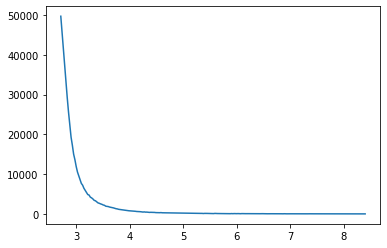

In [4]:
file=open("Ni.txt","r")          #recortamos a partir de la exponencial_ canal_114


Ni= open("Nii.txt","w+")             #creamos un archivo para escribir (w+) los datos con "."
for a in file:                          #type(a)=string
    b=a.replace(',', '.')               #hacemos que a los string con "," los reemplace por "."
    Ni.write(b)                      #le decimos que escriba los strings b en en el nuevo archivo
Ni.close()
data=np.loadtxt('Nii.txt',unpack=True)     #hacemos que nos lea los datos con "." como un vector
print(data.shape,type(data))
x=data.transpose()                         #como data es vector de 2 filas y 256 columnas lo trasponemos
Ni=pd.DataFrame(x)                       #lo convertimos en un dataframe
data
plt.plot(Ni.iloc[3:,0]*0.024,Ni.iloc[3:,1])
plt.show()


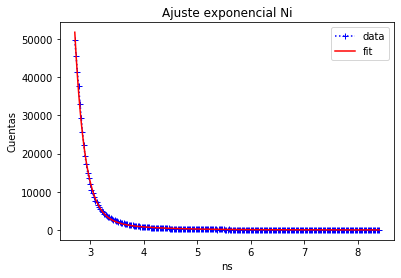

[3.27160904e+03 8.69931221e-01 1.48873629e+03 1.85377267e-01
 4.75294932e+04 1.85380829e-01]


In [5]:
x=Ni.iloc[3:,0]*0.024
y=Ni.iloc[3:,1]
# plt.plot(x,y)
def exp(x,N1,tau1,N2,tau2,N3,tau3):
    return N1*np.exp(-(x-2.71)/tau1)+N2*np.exp(-(x-2.71)/tau2)+N3*np.exp(-(x-2.71)/tau3)
popt,pcov=curve_fit(exp,x,y,p0=[1800,1.257,12000,0.369,37000,0.1709])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, exp(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Ni')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print(popt)

### **PolimA:**

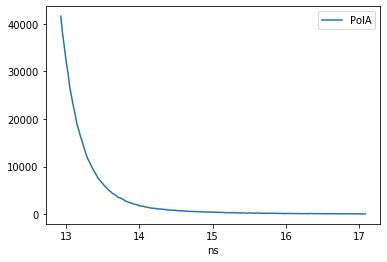

In [6]:
plt.plot(PolA.iloc[529:700,0],PolA.iloc[529:700,1],label="PolA")   #a partir de 529
plt.legend()
plt.xlabel("ns")
plt.show()


In [26]:
529*0.024

12.696

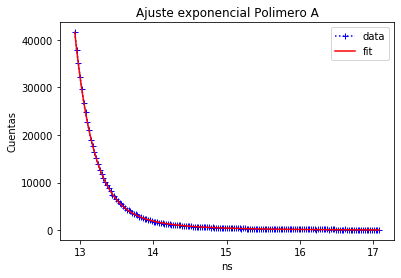

[8.03160745e+04 2.60911420e-01 5.64176465e+03 4.82328750e+03]


In [25]:
x=PolA.iloc[529:700,0]
y=PolA.iloc[529:700,1]
# plt.plot(x,y)

# plt.plot(x,y)
def exp(x,N1,tau1,N2,N3):
#     N2=3.27160904e+03
    tau2= 8.69931221e-01

    tau3= 1.85377267e-01
    return N1*np.exp(-(x-12.696)/tau1)+N2*np.exp(-(x-12.696)/tau2)+N3*np.exp(-(x-12.696)/tau3)
popt,pcov=curve_fit(exp,x,y,p0=[40000,0.12,3270,1200])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, exp(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Polimero A')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print(popt)

### **PolimB:**

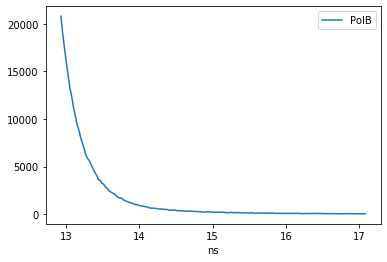

In [9]:
plt.plot(PolB.iloc[529:700,0],PolB.iloc[529:700,1],label="PolB")   #recortamos el espectro en la exp: canal 529
plt.legend()
plt.xlabel("ns")
plt.show()


In [10]:
529*0.024

12.696

/home/lautaro/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


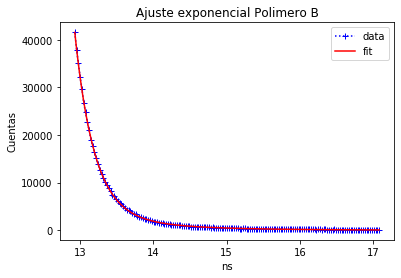

[9.30657571e+04 2.60666659e-01 5.00935872e+03 9.42166840e-01
 3.00000000e+03 1.00000000e-01]


In [27]:
def exp(x,N1,tau1,N2,tau2,N3,tau3):
    return N1*np.exp(-(x-12.696)/tau1)+N2*np.exp(-(x-12.696)/tau2)+N2*np.exp(-(x-2.71)/tau2)
popt,pcov=curve_fit(exp,x,y,p0=[90000,0.26,5000,0.94,3000,0.1])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, exp(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Polimero B')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print(popt)

## **Co:**
### Lo usamos para saber el canal de tiempo cero (si fuese ideal se veria como una delta)
ya que tiene decaimientos casi simultaneo

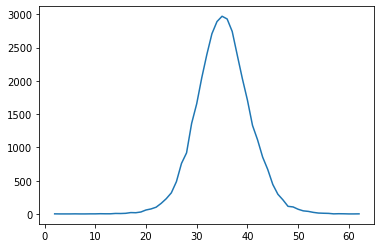

In [12]:
plt.plot(Co.iloc[:,0],Co.iloc[:,1],label=Co)
plt.show()
x=Co.iloc[:61,0]
y=Co.iloc[:61,1]


<class 'pandas.core.series.Series'>


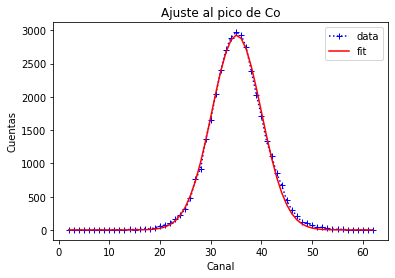

el centro de la gausiana es:  35.10739616175768  ±  0.0009629316328809742
[2928.64873039   35.10739616    4.8846219 ]


In [13]:
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
print(type(x))
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
type(x)

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste al pico de Co')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("el centro de la gausiana es: ",popt[1]," ± ", pcov[1,1])
print(popt)

In [14]:
N(t) = ∑N0e(−t/τi)   +N2*np.exp(-x/tau2)  N2,tau2   ,30000,1

SyntaxError: invalid character in identifier (<ipython-input-14-75c0f0038acc>, line 1)

In [ ]:
(4+109)*0.024

# x=list(range(524,700))
# x=np.array(x)
# plt.plot(x,50000*np.exp(1/(1.01*x-523)))
